In [1]:
#importing libraries

import os
import cv2
from tqdm.notebook import tqdm
import numpy as np
from matplotlib import pyplot as plt
import random

import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
keras = tf.keras
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from scipy.ndimage import rotate

In [2]:
#reading the dataset
dataset_dir = "./dataset"

print(os.listdir(dataset_dir))
train_classes = os.listdir(dataset_dir + "/train")
print(train_classes)
test_classes = os.listdir(dataset_dir + "/test")
print(test_classes)

['train']
['Active Subjects', 'Closed', 'Fatigue Subjects', 'no_yawn', 'Open', 'yawn']


FileNotFoundError: [WinError 3] The system cannot find the path specified: './dataset/test'

In [3]:
#loading the dataset
#{'Closed': 0, 'no_yawn': 2, 'Open': 1, 'yawn': 3}
dataset_dir = "./dataset"

def load_images(directory, returnYawn = False):
    images = []
    labels = []
    open_eyes = []
    closed_eyes = []
    yawn = []
    no_yawn = []
    active_subject = []
    fatigue_subject = []

    for category in os.listdir(directory):
        print(category)
        for filename in tqdm(os.listdir(directory+category)):
            image_path = os.path.join(directory,category,filename)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            image = cv2.resize(image,(128,128))
            image = image.astype('float32') / 255.0  # Scale pixel values to [0, 1]
            images.append(image)
            if(category == 'Open' or category == 'Open_Eyes'):
                numb = 1
                #open_eyes.append(image)
            elif(category ==  'no_yawn'):
                numb = 2 
                no_yawn.append(image)
            elif(category == 'yawn'):
                numb = 3
                yawn.append(image)
            elif(category == 'Active Subjects'):
                numb = 4
                #active_subject.append(image)
            elif(category == 'Fatigue Subjects'):
                numb = 5
                #fatigue_subject.append(image)
            else :
                numb = 0
                #closed_eyes.append(image)
            labels.append(numb)

    images = np.array(images,dtype='float32')
    if(not returnYawn):
        return images, np.array(labels)
    return images, np.array(labels), yawn, no_yawn
    #return open_eyes, closed_eyes, yawn, no_yawn, active_subject, fatigue_subject

In [44]:


label_classes = ['closed', 'open', 'no_yawn', 'yawn', 'active', 'fatigued']
#loading dataset
print('*******Loading Train Data*******')
#open_eyes, closed_eyes, yawn, no_yawn, active_subject, fatigue_subject = load_images(dataset_dir + '/train/' )
train_ds = load_images(dataset_dir + '/train/' )


*******Loading Train Data*******
Active Subjects


  0%|          | 0/2558 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [4]:
#displaying images function
def display_images_with_labels(images, labels, prediction):
    
    fig, axs = plt.subplots(5, 8, figsize=(15, 10))
    fig.suptitle('Images and Labels')
    for i in range(40):
        axs[i // 8, i % 8].imshow(images[i])
        axs[i // 8, i % 8].axis('off')
        if(prediction):
            axs[i // 8, i % 8].set_title(label_classes[np.argmax(labels[i])])
        else:
            axs[i // 8, i % 8].set_title(label_classes[labels[i]])
    plt.show()

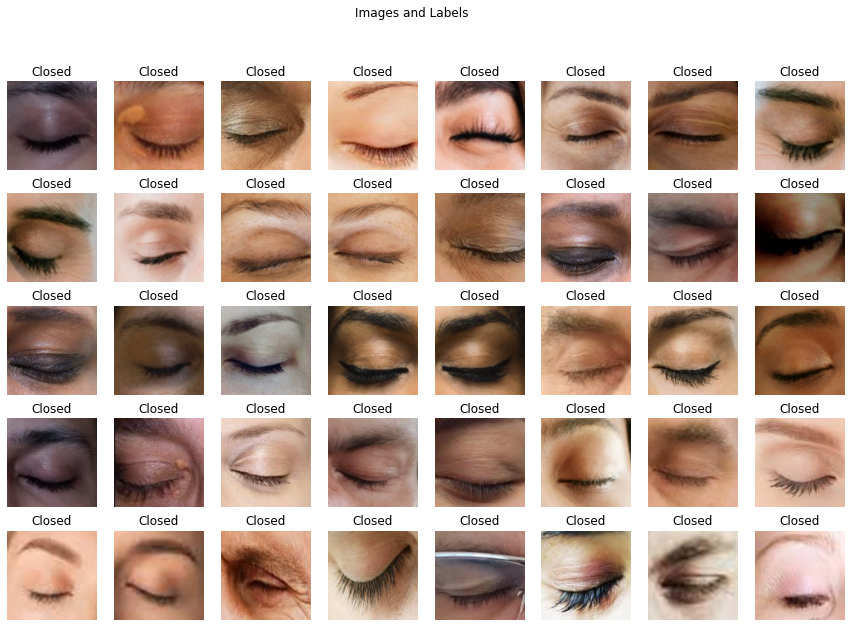

In [56]:
#showing the dataset

display_images_with_labels(train_ds[0], train_ds[1], False)

In [5]:
def display_random_images_with_labels(images, labels):
    """
        Display 40 random images and their labels from the input arrays.
    """
    # Choose 40 random images
    indices = random.sample(range(len(images)), 40)
    random_images = [images[i] for i in indices]
    random_labels = [labels[i] for i in indices]
    
    fig, axs = plt.subplots(5, 8, figsize=(15, 10))
    fig.suptitle('Random Images and Labels')
    for i, (image, label) in enumerate(zip(random_images, random_labels)):
        axs[i // 8, i % 8].imshow(image)
        axs[i // 8, i % 8].axis('off')
        axs[i // 8, i % 8].set_title(label_classes[label])
    plt.show()

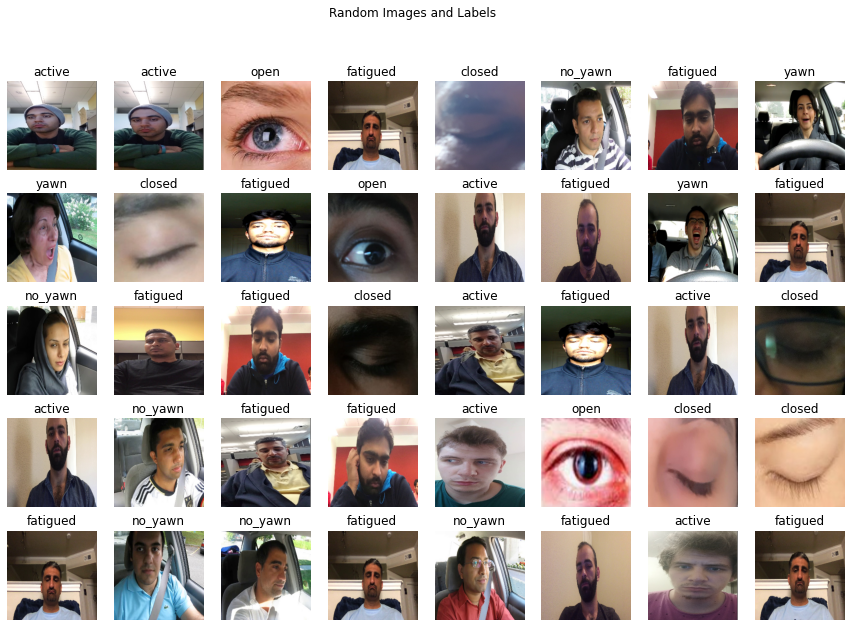

In [98]:
display_random_images_with_labels(train_ds[0], train_ds[1])

4809
1603
1604


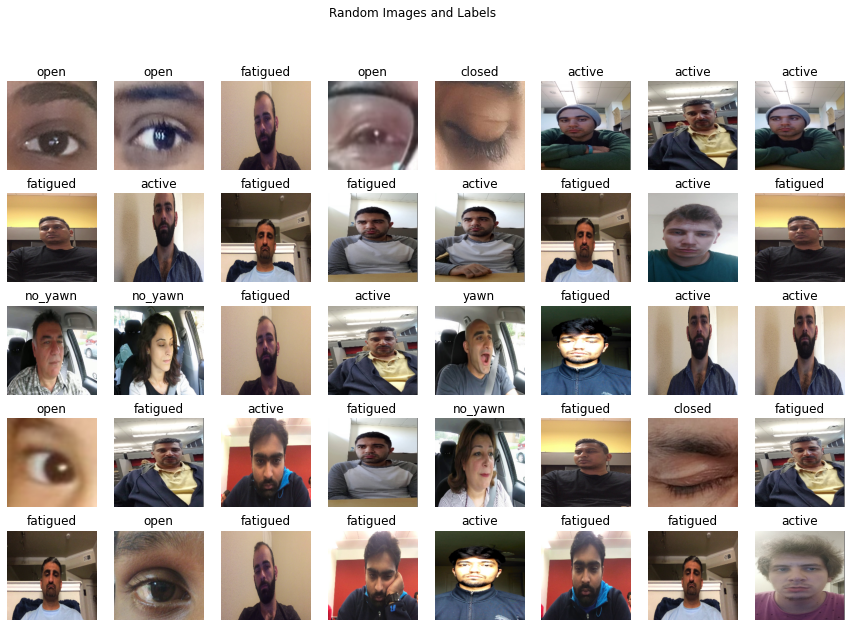

In [99]:
#spliting dataset
x_train,y_train = train_ds
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.4)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)
print(len(x_train))
print(len(x_test))
print(len(x_val))
display_random_images_with_labels(x_train, y_train)

In [21]:
# izdelava modela 
def init_model():
    # Define a sequential model
    model = models.Sequential()
    # Add a 2D convolutional layer with 16 filters, a 3x3 kernel size, ReLU activation, and input shape of (224, 224, 3)
    model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    # Add a max pooling layer with a 2x2 pool size
    model.add(layers.MaxPooling2D((2, 2)))
    # Add another 2D convolutional layer with 32 filters and a 3x3 kernel size
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    # Add another max pooling layer
    model.add(layers.MaxPooling2D((2, 2)))
    # Add a third 2D convolutional layer with 64 filters and a 3x3 kernel size
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    # Flatten the output from the convolutional layers into a 1D array
    model.add(layers.Flatten())
    # Add a dense layer with 128 units and ReLU activation
    model.add(layers.Dense(128, activation='relu'))
    # Add a dense output layer with 4 units and no activation function (for multi-class classification)
    model.add(layers.Dense(6, activation=None))
    return  model

In [104]:
model = init_model()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [105]:

print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))#print(y_test[0])
print(x_train.shape)
print(y_train.shape)
# izvedba ucenja 

history = model.fit(x_train, y_train, epochs=8,
                    validation_data=(x_test, y_test))

4809
4809
1603
1603
(4809, 224, 224, 3)
(4809,)
Epoch 1/8
151/151 [==============================] - 101s 663ms/step - loss: 0.6478 - accuracy: 0.7767 - val_loss: 0.3107 - val_accuracy: 0.8665
Epoch 2/8
151/151 [==============================] - 94s 620ms/step - loss: 0.2808 - accuracy: 0.8756 - val_loss: 0.2661 - val_accuracy: 0.8915
Epoch 3/8
151/151 [==============================] - 93s 614ms/step - loss: 0.2330 - accuracy: 0.9062 - val_loss: 0.2562 - val_accuracy: 0.8971
Epoch 4/8
151/151 [==============================] - 95s 631ms/step - loss: 0.2326 - accuracy: 0.9043 - val_loss: 0.2348 - val_accuracy: 0.9027
Epoch 5/8
151/151 [==============================] - 96s 639ms/step - loss: 0.1676 - accuracy: 0.9351 - val_loss: 0.2528 - val_accuracy: 0.8977
Epoch 6/8
151/151 [==============================] - 98s 648ms/step - loss: 0.1491 - accuracy: 0.9401 - val_loss: 0.2717 - val_accuracy: 0.9002
Epoch 7/8
151/151 [==============================] - 97s 640ms/step - loss: 0.1326 - ac

In [24]:
def chart(history):

    plt.figure(figsize=(20,10))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()

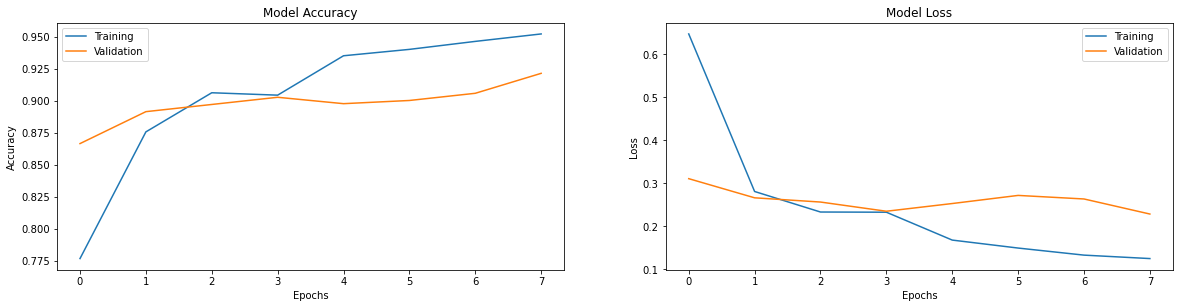

In [107]:
chart(history)

In [8]:
def calculate_accuracy(prediction, y_val, label_number = -1):
    """
    Calculates the accuracy of the prediction given the correct labels.

    Args:
    prediction (list): List of predicted labels.
    y_val (list): List of correct labels.

    Returns:
    float: Accuracy of the prediction as a percentage.
    """

    # Get the total number of examples in the dataset
    num_examples = len(prediction)
    num_correct = 0
    if(label_number == -1):
        # Calculate the number of correctly predicted labels
        num_correct = sum([1 if np.argmax(prediction[i]) == y_val[i] else 0 for i in range(num_examples)])
    else:
        num_examples = 0
        for i in range(len(y_val)):
            if y_val[i] == label_number :
                num_examples += 1
                if(y_val[i] ==  np.argmax(prediction[i])):
                    num_correct += 1


    # Calculate the accuracy as a percentage
    accuracy = (num_correct / num_examples) * 100

    return accuracy


In [27]:
#model prediction label_classes = ['closed', 'open', 'no_yawn', 'yawn', 'active', 'fatigued']
def display_accuracy(predictions, y_val):
    accuracy = calculate_accuracy(predictions, y_val)
    print("whole Accuracy: {:.2f}%".format(accuracy))

    closed_accuracy = calculate_accuracy(predictions, y_val, label_number = 0)
    print("closed Accuracy: {:.2f}%".format(closed_accuracy))
    open_accuracy = calculate_accuracy(predictions, y_val, label_number = 1)
    print("open Accuracy: {:.2f}%".format(open_accuracy))
    yawn_accuracy = calculate_accuracy(predictions, y_val,label_number = 3)
    print("yawn Accuracy: {:.2f}%".format(yawn_accuracy))
    no_yawn_accuracy = calculate_accuracy(predictions,y_val,label_number = 2)
    print("no_yawn Accuracy: {:.2f}%".format(no_yawn_accuracy))
    active_accuracy = calculate_accuracy(predictions, y_val, label_number = 4)
    print("active Accuracy: {:.2f}%".format(active_accuracy))
    fatigue_accuracy = calculate_accuracy(predictions,y_val,label_number = 5)
    print("fatigue Accuracy: {:.2f}%".format(fatigue_accuracy))
    




In [14]:
predictions = model.predict(x_val) 
display_accuracy(predictions, y_val)
display_images_with_labels(x_val, predictions, True)


NameError: name 'model' is not defined

# Increasing the datasets
i want to see if the accuracy improves with a larger dataset size.
In the training before i use smaller datatsets for active subject (2558 images) and fatigued subjects(2558 images), so i will now use a larger dataset with 4560 images. 
Also to increase the number of images in the dataset for closed and open eyes i will use another dataset, so together there will be 2726 images for closed eyes and 2726 images for open eyes.
For yawning and no yawning dataset i do not seem to find another dataset. So i will simulate with transforming existing images.

*******Loading Train Data*******
Active Subjects


  0%|          | 0/4560 [00:00<?, ?it/s]

Closed


  0%|          | 0/726 [00:00<?, ?it/s]

Closed_Eyes


  0%|          | 0/2000 [00:00<?, ?it/s]

Fatigue Subjects


  0%|          | 0/4560 [00:00<?, ?it/s]

no_yawn


  0%|          | 0/725 [00:00<?, ?it/s]

Open


  0%|          | 0/726 [00:00<?, ?it/s]

Open_Eyes


  0%|          | 0/2000 [00:00<?, ?it/s]

yawn


  0%|          | 0/723 [00:00<?, ?it/s]

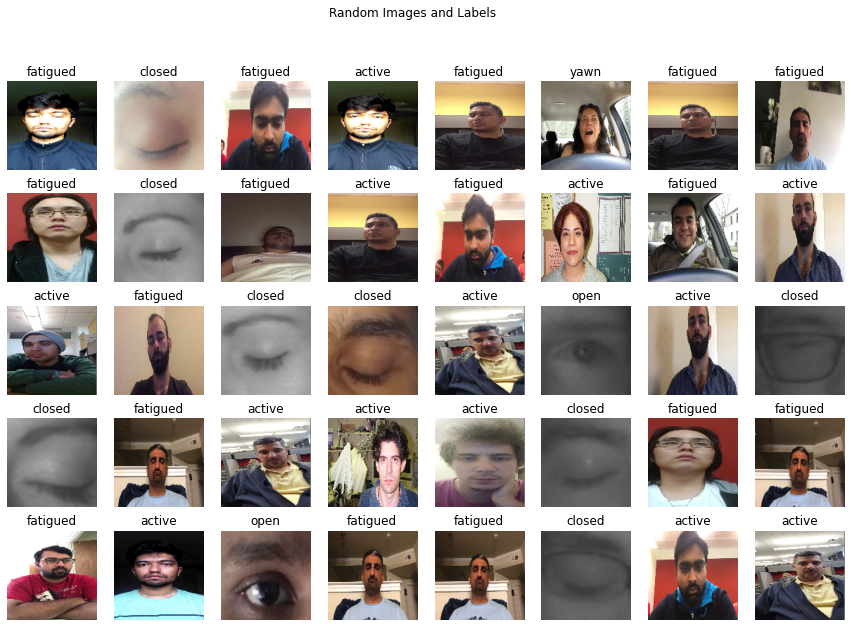

In [9]:
label_classes = ['closed', 'open', 'no_yawn', 'yawn', 'active', 'fatigued']
#loading dataset
print('*******Loading Train Data*******')
#open_eyes, closed_eyes, yawn, no_yawn, active_subject, fatigue_subject = load_images(dataset_dir + '/train/' )
x_train, y_train, yawn_images, no_yawn_images = load_images('datasetBig/train/', True )
#display_images_with_labels(x_train, y_train, False)
display_random_images_with_labels(x_train, y_train)




In [12]:
# augmentation
def rotate1(faces, labels):
    facesTmp =np.array( faces.copy())
    rotatedFaces = np.array([])
    rotatedLabels = np.array([])
    for j in range(4):
        for i in range(len(faces)):
            if(j<2):
                facesTmp[i] = rotate(faces[i], 10 * j, reshape=False)
            else:
                facesTmp[i] = rotate(faces[i], 330 + 10 * (j-3) , reshape=False)
        #show_40_distinct_people(facesTmp, np.unique(labels))
        if rotatedFaces.size == 0:
            rotatedFaces = facesTmp
            rotatedLabels = labels
        else:
            rotatedFaces = np.concatenate((rotatedFaces, facesTmp))
            rotatedLabels = np.concatenate((rotatedLabels, labels))
    return rotatedFaces, rotatedLabels

def normalize(faces):
    X = []
    for i in range(len(faces)):
        image = faces[i].copy()
        X.append((image - np.mean(image)) / np.std(image))

    return X

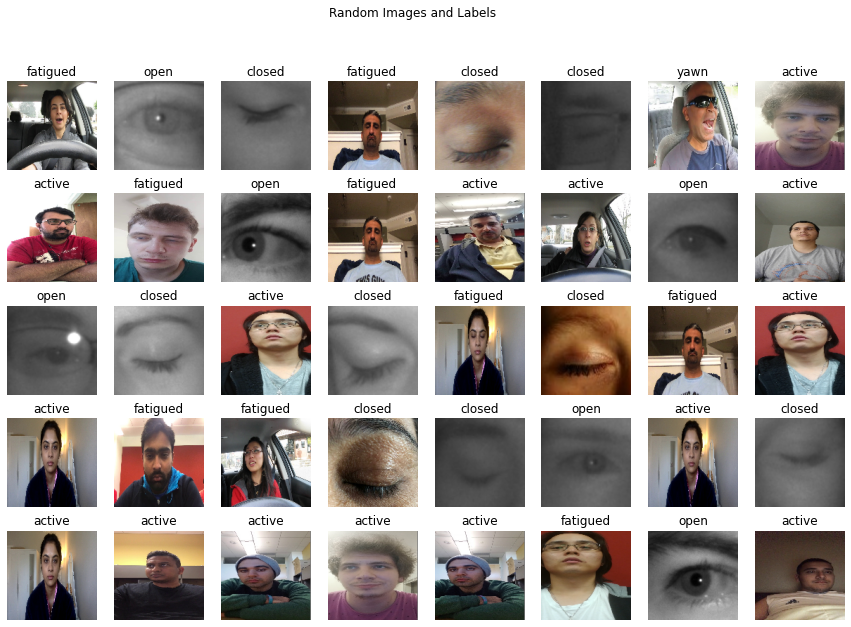

In [13]:
display_random_images_with_labels(x_train, y_train)

yawn_labels = np.full(len(yawn_images), 3)
no_yawn_labels = np.full(len(no_yawn_images), 2)

In [14]:
rotated_yawn_images, rotated_yawn_labels = rotate1(yawn_images,yawn_labels)
print(len(rotated_yawn_images))
rotated_no_yawn_images, rotated_no_yawn_labels = rotate1(no_yawn_images,no_yawn_labels)


2892


5792


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

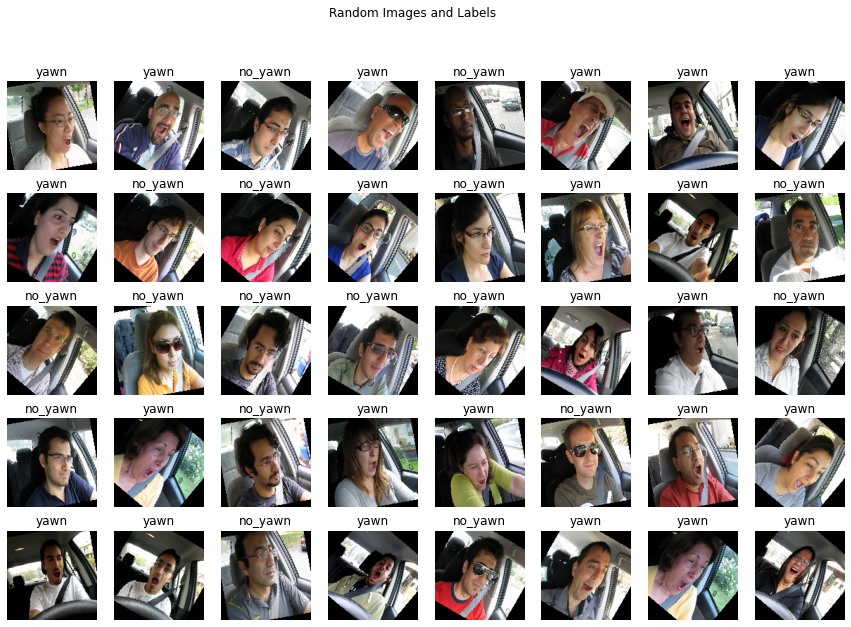

In [15]:
rotated_images = np.concatenate((rotated_yawn_images,rotated_no_yawn_images))
rotated_labels = np.concatenate((rotated_yawn_labels, rotated_no_yawn_labels))
print(len(rotated_images))
display_random_images_with_labels(rotated_images, rotated_labels)

1448


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

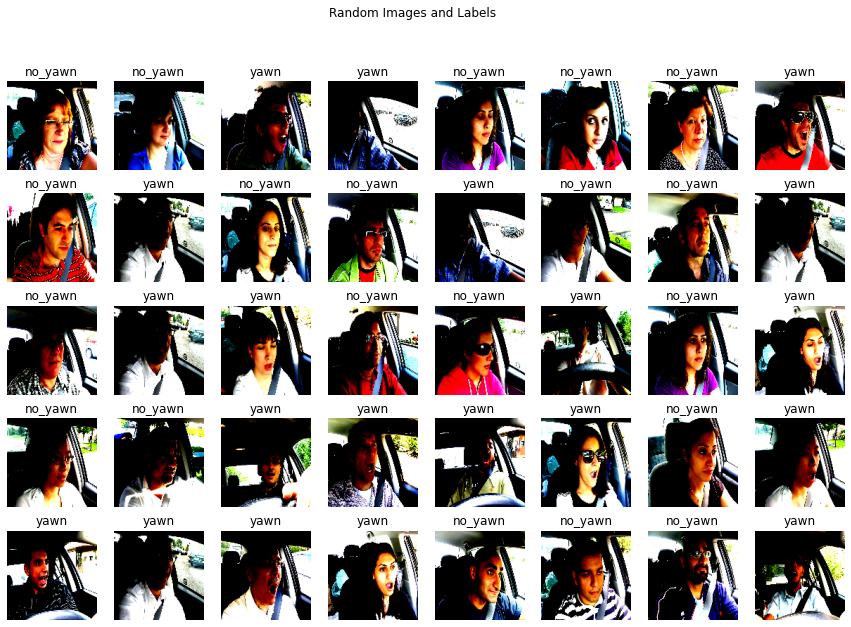

In [16]:

normalized_yawn = normalize(yawn_images)
normalized_no_yawn = normalize(no_yawn_images)

normalized_images = np.concatenate((normalized_yawn, normalized_no_yawn))
normalized_labels = np.concatenate((yawn_labels, no_yawn_labels))
print(len(normalized_labels))

display_random_images_with_labels(normalized_images, normalized_labels)

23260


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

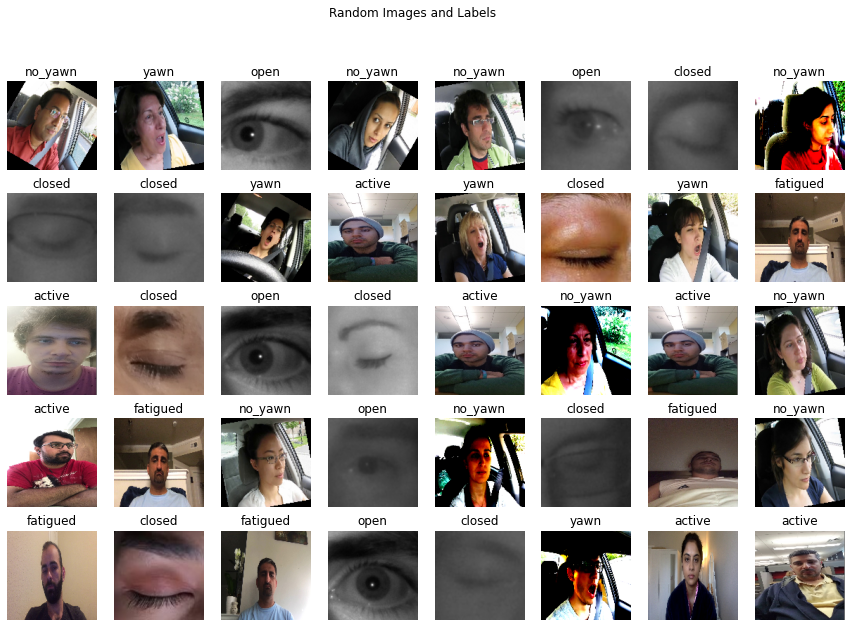

In [17]:
# add the modified dataset to the whole dataset 

dataset_images = np.concatenate((x_train, rotated_images, normalized_images))
dataset_labels = np.concatenate((y_train, rotated_labels, normalized_labels))
print(len(dataset_images))
display_random_images_with_labels(dataset_images, dataset_labels)

23260
13956
4652
4652


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

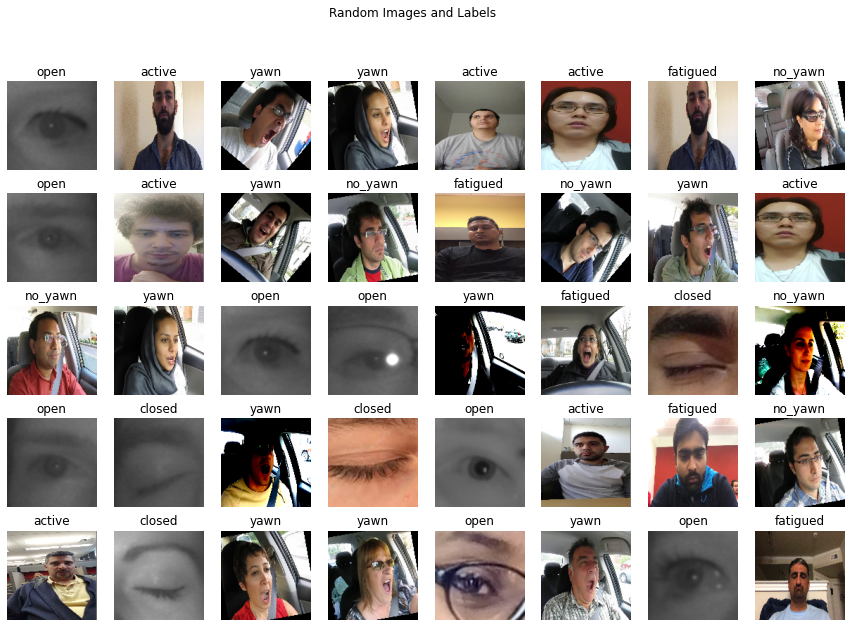

In [18]:
#splitting the dataset
print(len(dataset_images))
x_train,y_train = dataset_images, dataset_labels
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.4)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)
print(len(x_train))
print(len(x_test))
print(len(x_val))
display_random_images_with_labels(x_train, y_train)


In [23]:
model = init_model()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))#print(y_test[0])
print(x_train.shape)
print(y_train.shape)
# izvedba ucenja 

history = model.fit(x_train, y_train, epochs=6,
                    validation_data=(x_test, y_test))

13956
13956
4652
4652
(13956, 128, 128, 3)
(13956,)
Epoch 1/6
437/437 [==============================] - 84s 190ms/step - loss: 0.5521 - accuracy: 0.7485 - val_loss: 0.4581 - val_accuracy: 0.7954
Epoch 2/6
437/437 [==============================] - 79s 182ms/step - loss: 0.3411 - accuracy: 0.8447 - val_loss: 0.3211 - val_accuracy: 0.8644
Epoch 3/6
437/437 [==============================] - 79s 180ms/step - loss: 0.2586 - accuracy: 0.8901 - val_loss: 0.2600 - val_accuracy: 0.8887
Epoch 4/6
437/437 [==============================] - 78s 180ms/step - loss: 0.1939 - accuracy: 0.9225 - val_loss: 0.1984 - val_accuracy: 0.9263
Epoch 5/6
437/437 [==============================] - 79s 181ms/step - loss: 0.1501 - accuracy: 0.9393 - val_loss: 0.2355 - val_accuracy: 0.9112
Epoch 6/6
437/437 [==============================] - 79s 181ms/step - loss: 0.1384 - accuracy: 0.9474 - val_loss: 0.1781 - val_accuracy: 0.9280


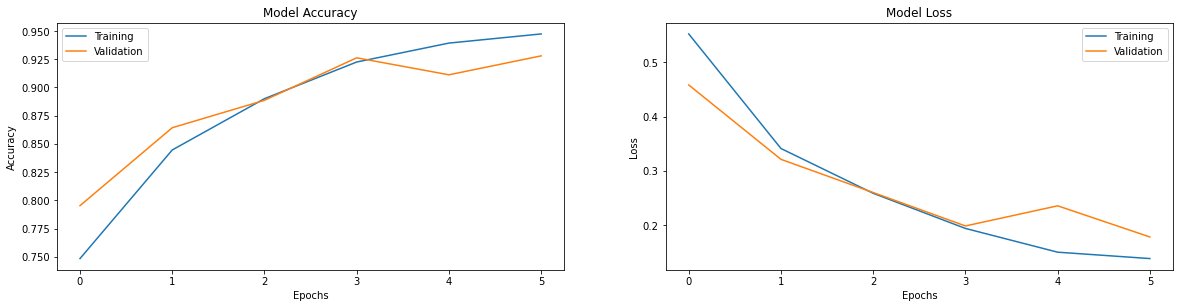

In [25]:
chart(history)

146/146 [==============================] - 5s 33ms/step
whole Accuracy: 92.13%
closed Accuracy: 99.44%
open Accuracy: 98.63%
yawn Accuracy: 96.56%
no_yawn Accuracy: 91.98%
active Accuracy: 90.56%
fatigue Accuracy: 82.40%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


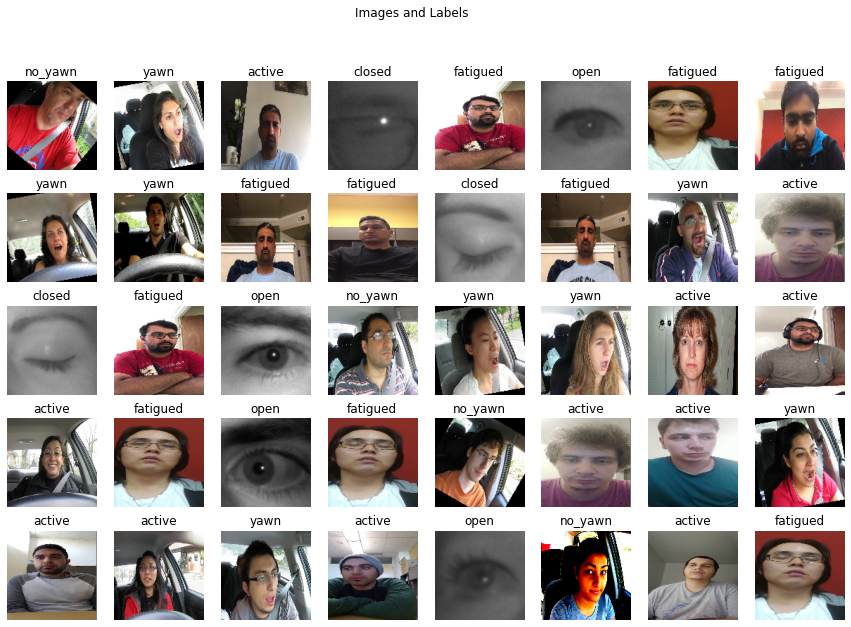

In [28]:
predictions = model.predict(x_val) 
display_accuracy(predictions, y_val)
display_images_with_labels(x_val, predictions, True)

# Increasing the number of epoch

In [ ]:
model = init_model()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))#print(y_test[0])
print(x_train.shape)
print(y_train.shape)
# izvedba ucenja 

history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_test, y_test))

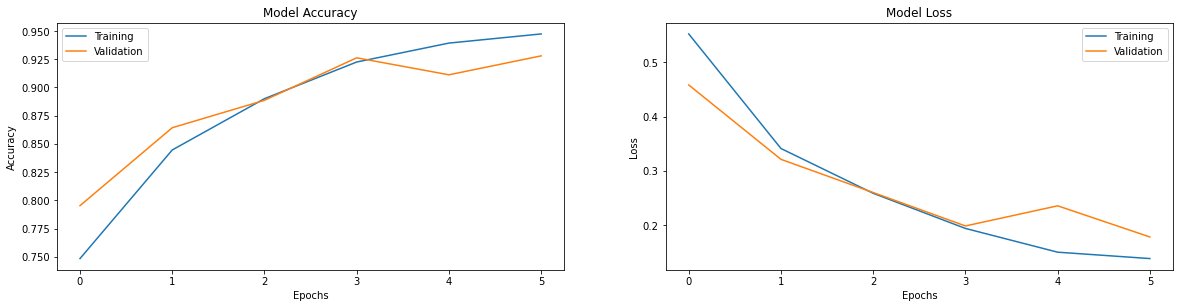

In [29]:
chart(history)
predictions = model.predict(x_val) 
display_accuracy(predictions, y_val)
display_images_with_labels(x_val, predictions, True)